In [25]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/aimeeoh/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/aimeeoh/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/aimeeoh/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/aimeeoh/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /Users/aimeeoh/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading pa

True

In [26]:
cdg_data = pd.read_csv('data/cho-dang-gol/csv/detailed-reviews-of-cho-dang-gol.csv')

df_cdg = cdg_data[['place_name', 'rating', 'review_text', 'published_at_date']]
df_cdg

,place_name,rating,review_text,published_at_date
0,Cho Dang Gol,5,"Service was excellent, food was delicious, and...",2024-03-01 02:28:47.011670
1,Cho Dang Gol,5,Delicious food with a good vegetarian options....,2024-02-29 12:28:47.018767
2,Cho Dang Gol,5,"Authentic Korean dishes, and everything is so ...",2024-02-29 12:28:47.022915
3,Cho Dang Gol,5,"Wow, more delicious than Korea... Really crazy...",2024-02-28 12:28:47.026745
4,Cho Dang Gol,5,Korean restaurant located in Koreatown. This p...,2024-02-27 12:28:47.030659
...,...,...,...,...
2270,Cho Dang Gol,5,"Be careful here, some of the dished are worth ...",2012-03-01 12:31:38.959637
2271,Cho Dang Gol,4,"reasonably priced, authentic korean food. vege...",2012-03-01 12:31:38.963049
2272,Cho Dang Gol,5,This has turned into my favorite Korean restau...,2012-03-01 12:31:38.966705
2273,Cho Dang Gol,4,NaN,2012-03-01 12:31:38.970457


Extracting Year from 'published_at_date' column

In [27]:
df_cdg['published_at_date'] = pd.to_datetime(df_cdg['published_at_date']).dt.year
df_cdg

/var/folders/h6/vygxj7rj5tq9z54ggx6zd6080000gn/T/ipykernel_60898/1377672720.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cdg['published_at_date'] = pd.to_datetime(df_cdg['published_at_date']).dt.year


,place_name,rating,review_text,published_at_date
0,Cho Dang Gol,5,"Service was excellent, food was delicious, and...",2024
1,Cho Dang Gol,5,Delicious food with a good vegetarian options....,2024
2,Cho Dang Gol,5,"Authentic Korean dishes, and everything is so ...",2024
3,Cho Dang Gol,5,"Wow, more delicious than Korea... Really crazy...",2024
4,Cho Dang Gol,5,Korean restaurant located in Koreatown. This p...,2024
...,...,...,...,...
2270,Cho Dang Gol,5,"Be careful here, some of the dished are worth ...",2012
2271,Cho Dang Gol,4,"reasonably priced, authentic korean food. vege...",2012
2272,Cho Dang Gol,5,This has turned into my favorite Korean restau...,2012
2273,Cho Dang Gol,4,NaN,2012


Charts for ratings

<AxesSubplot:xlabel='rating'>

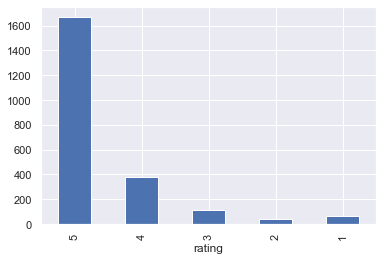

In [28]:
df_cdg['rating'].value_counts()[[5, 4, 3, 2, 1]].plot(kind='bar')

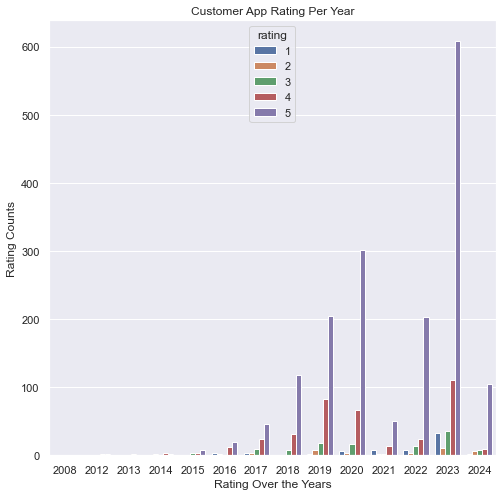

In [29]:
plt.figure(figsize=(8, 8))
sns.countplot(x = 'published_at_date', hue ='rating', data = df_cdg)
plt.title('Customer App Rating Per Year')
plt.xlabel("Rating Over the Years")
plt.ylabel('Rating Counts')
plt.show()

In [30]:
df_cdg['review_text'] = df_cdg['review_text'].astype("string")

df_cdg[['review_text']]

/var/folders/h6/vygxj7rj5tq9z54ggx6zd6080000gn/T/ipykernel_60898/169670795.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cdg['review_text'] = df_cdg['review_text'].astype("string")


,review_text
0,"Service was excellent, food was delicious, and..."
1,Delicious food with a good vegetarian options....
2,"Authentic Korean dishes, and everything is so ..."
3,"Wow, more delicious than Korea... Really crazy..."
4,Korean restaurant located in Koreatown. This p...
...,...
2270,"Be careful here, some of the dished are worth ..."
2271,"reasonably priced, authentic korean food. vege..."
2272,This has turned into my favorite Korean restau...
2273,<NA>


In [31]:
import re
from nltk.stem import WordNetLemmatizer, PorterStemmer, SnowballStemmer
stop_words_file = 'Stopwords.txt'

stop_words = []

with open(stop_words_file, "r") as f:
    for line in f:
        stop_words.extend(line.split()) 
        
stop_words = stop_words  

def preprocess(raw_text):
    
    #regular expression keeping only letters 
    letters_only_text = re.sub("[^a-zA-Z]", " ", raw_text)

    # convert to lower case and split into words -> convert string into list ( 'hello world' -> ['hello', 'world'])
    words = letters_only_text.lower().split()

    cleaned_words = []
    lemmatizer = PorterStemmer() #plug in here any other stemmer or lemmatiser you want to try out
    
    # remove stopwords
    for word in words:
        if word not in stop_words:
            cleaned_words.append(word)
    
    # stemm or lemmatise words
    stemmed_words = []
    for word in cleaned_words:
        word = lemmatizer.stem(word)   #dont forget to change stem to lemmatize if you are using a lemmatizer
        stemmed_words.append(word)
    
    # converting list back to string
    return " ".join(stemmed_words)

In [32]:
test_sentence = "Service was excellent, food was delicious, and vibe was great ! We got the korean style boneless fried chicken (sweet chili sauce was fire), veg buckwheat pancake, and spicy chicken. Our server was so kind and attentive & we had a great experience; the sweet treat cookie at end was so cute :)"

preprocess(test_sentence)

'servic excel food delici vibe great korean style boneless fri chicken sweet chili sauc fire veg buckwheat pancak spici chicken server kind attent great experi sweet treat cooki end cute'

In [33]:
# cdg_data['prep'] = cdg_data['review_text'].apply(preprocess)

prep = []

for text in df_cdg['review_text']:
    if pd.isna(text):
        prep.append('')
    else:
        prep.append(preprocess(text))

df_cdg['prep'] = prep

df_cdg.head()

/var/folders/h6/vygxj7rj5tq9z54ggx6zd6080000gn/T/ipykernel_60898/2803378760.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cdg['prep'] = prep


,place_name,rating,review_text,published_at_date,prep
0,Cho Dang Gol,5,"Service was excellent, food was delicious, and...",2024,servic excel food delici vibe great korean sty...
1,Cho Dang Gol,5,Delicious food with a good vegetarian options....,2024,delici food good vegetarian option staff knowl...
2,Cho Dang Gol,5,"Authentic Korean dishes, and everything is so ...",2024,authent korean dish good server friendli choda...
3,Cho Dang Gol,5,"Wow, more delicious than Korea... Really crazy...",2024,wow delici korea crazi tast time
4,Cho Dang Gol,5,Korean restaurant located in Koreatown. This p...,2024,korean restaur locat koreatown place fill quic...


In [34]:
from collections import Counter
Counter(" ".join(df_cdg["prep"]).split()).most_common(50)

[('food', 901),
 ('korean', 684),
 ('tofu', 599),
 ('good', 464),
 ('delici', 408),
 ('dish', 406),
 ('restaur', 383),
 ('servic', 318),
 ('great', 318),
 ('place', 297),
 ('wait', 297),
 ('stew', 259),
 ('rice', 227),
 ('tast', 222),
 ('time', 218),
 ('spici', 217),
 ('order', 204),
 ('recommend', 201),
 ('side', 201),
 ('kimchi', 182),
 ('amaz', 163),
 ('love', 163),
 ('seafood', 160),
 ('soup', 152),
 ('authent', 143),
 ('back', 134),
 ('eat', 128),
 ('staff', 123),
 ('friendli', 117),
 ('pancak', 116),
 ('tabl', 116),
 ('bulgogi', 116),
 ('flavor', 112),
 ('nice', 108),
 ('serv', 107),
 ('worth', 105),
 ('price', 101),
 ('lunch', 99),
 ('banchan', 98),
 ('made', 94),
 ('menu', 91),
 ('make', 89),
 ('busi', 89),
 ('pork', 86),
 ('beef', 86),
 ('bit', 86),
 ('meal', 84),
 ('korea', 82),
 ('hot', 81),
 ('bibimbap', 80)]

In [35]:
def create_sentiment(rating):
    
    if rating==1 or rating==2:
        return -1 # negative sentiment
    elif rating==4 or rating==5:
        return 1 # positive sentiment
    else:
        return 0 # neutral sentiment

df_cdg['sentiment'] = df_cdg['rating'].apply(create_sentiment)
df_cdg

/var/folders/h6/vygxj7rj5tq9z54ggx6zd6080000gn/T/ipykernel_60898/2485862262.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cdg['sentiment'] = df_cdg['rating'].apply(create_sentiment)


,place_name,rating,review_text,published_at_date,prep,sentiment
0,Cho Dang Gol,5,"Service was excellent, food was delicious, and...",2024,servic excel food delici vibe great korean sty...,1
1,Cho Dang Gol,5,Delicious food with a good vegetarian options....,2024,delici food good vegetarian option staff knowl...,1
2,Cho Dang Gol,5,"Authentic Korean dishes, and everything is so ...",2024,authent korean dish good server friendli choda...,1
3,Cho Dang Gol,5,"Wow, more delicious than Korea... Really crazy...",2024,wow delici korea crazi tast time,1
4,Cho Dang Gol,5,Korean restaurant located in Koreatown. This p...,2024,korean restaur locat koreatown place fill quic...,1
...,...,...,...,...,...,...
2270,Cho Dang Gol,5,"Be careful here, some of the dished are worth ...",2012,care dish worth arent homemad tofu tofu bo ssa...,1
2271,Cho Dang Gol,4,"reasonably priced, authentic korean food. vege...",2012,price authent korean food vegetarian option bi...,1
2272,Cho Dang Gol,5,This has turned into my favorite Korean restau...,2012,turn favorit korean restaur town cowork includ...,1
2273,Cho Dang Gol,4,<NA>,2012,,1


<AxesSubplot:xlabel='sentiment', ylabel='count'>

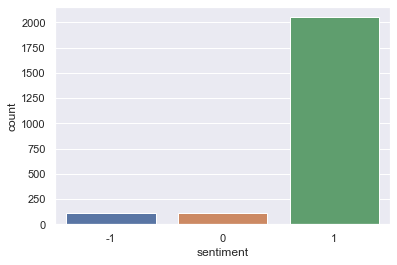

In [36]:
sns.set_theme()

# Create a visualization
sns.countplot(
    data=df_cdg,
    x="sentiment"
)

In [37]:
# initialize NLTK sentiment analyzer

analyzer = SentimentIntensityAnalyzer()


# create get_sentiment function

def get_sentiment(text):

    scores = analyzer.polarity_scores(text)

    sentiment = 1 if scores['pos'] > 0 else 0

    return scores['compound']




# apply get_sentiment function

df_cdg['review_sentiment'] = df_cdg['prep'].apply(get_sentiment)

df_cdg['review_sentiment']

/var/folders/h6/vygxj7rj5tq9z54ggx6zd6080000gn/T/ipykernel_60898/933887551.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cdg['review_sentiment'] = df_cdg['prep'].apply(get_sentiment)


0       0.9747
1       0.4404
2       0.8176
3       0.5859
4       0.9595
         ...  
2270    0.8316
2271    0.0000
2272    0.9403
2273    0.0000
2274    0.7351
Name: review_sentiment, Length: 2275, dtype: float64

<AxesSubplot:xlabel='sentiment', ylabel='count'>

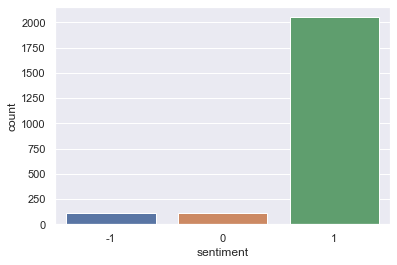

In [38]:
sns.set_theme()

# Create a visualization
sns.countplot(
    data=df_cdg,
    x="sentiment"
)

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(strip_accents=None, 
                        lowercase=False,
                        preprocessor=None)

X = tfidf.fit_transform(df_cdg['prep'])

from sklearn.model_selection import train_test_split
y = df_cdg['sentiment'] # target variable
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [40]:
# SVM
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

clf = LinearSVC(random_state=0)

clf.fit(X_train,y_train)

y_test_pred=clf.predict(X_test)

report=classification_report(y_test, y_test_pred, output_dict=True)
report

/Users/aimeeoh/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aimeeoh/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aimeeoh/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'-1': {'precision': 0.3333333333333333,
  'recall': 0.03125,
  'f1-score': 0.05714285714285714,
  'support': 32},
 '0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 29},
 '1': {'precision': 0.8957597173144877,
  'recall': 0.9980314960629921,
  'f1-score': 0.9441340782122905,
  'support': 508},
 'accuracy': 0.8927943760984183,
 'macro avg': {'precision': 0.40969768354927366,
  'recall': 0.34309383202099736,
  'f1-score': 0.33375897845171587,
  'support': 569},
 'weighted avg': {'precision': 0.8184755765596247,
  'recall': 0.8927943760984183,
  'f1-score': 0.8461312533574956,
  'support': 569}}

In [41]:
# make altered data into csv file
df_cdg.to_csv('altdata/' + 'cdg.csv', index=False)